In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

[140, 125, 110, 95]


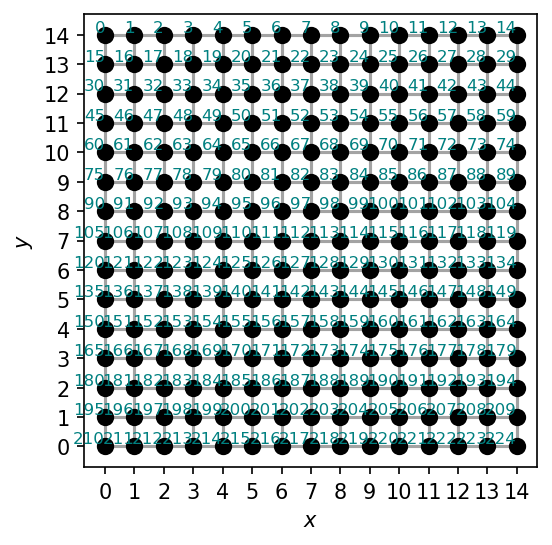

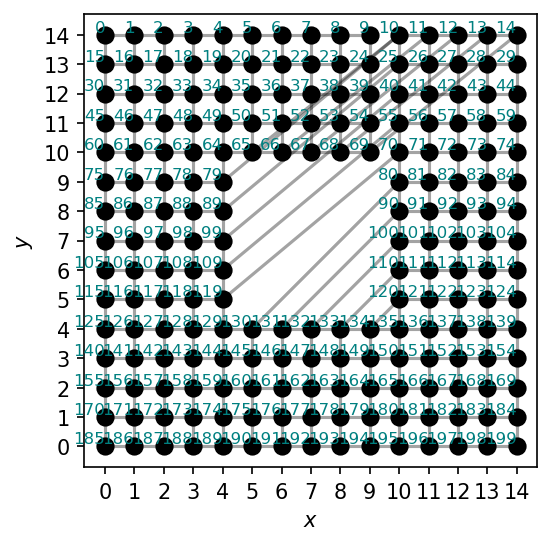

In [2]:
# Physical parameters
mu = 2.0
delta = complex(1.0, 0.0)
t = 1

N_hole = 5
N = 3 * N_hole
lattice = SquareLattice(N, BC="open")
middle_sites = [
    (N - N_hole) // 2 * N + (N - N_hole) // 2 + i * N + j
    for i in range(N_hole)
    for j in range(N_hole)
]

lattice.plot(True)
print([2 * N_hole * N + N_hole - (i + 1) * N for i in range(N_hole - 1)])

lattice.glue_bond(
    [2 * N_hole * N + N_hole + i for i in range(N_hole)],
    [N_hole * N + 2 * N_hole + i * N for i in range(N_hole)],
    (0, 2),
    codim=1,
)
lattice.glue_bond(
    [2 * N_hole * N + N_hole - 1 - (i + 1) * N for i in range(N_hole - 1)],
    [N_hole * N + 2 * N_hole - (i + 1) * N for i in range(N_hole - 1)],
    (1, 3),
    codim=1,
)
lattice.glue_bond([N_hole * N + N_hole - 1], [2 * N_hole], (1, 3), codim=1)
lattice.glue_bond([(N_hole - 1) * N + N_hole], [2 * N_hole], (2, 0), codim=1)
lattice.glue_bond(
    [(N_hole - 1) * N + N_hole + i + 1 for i in range(N_hole - 1)],
    [2 * N_hole + i + 1 for i in range(N_hole - 1)],
    (2, 0),
    codim=1,
)

lattice.remove_sites(middle_sites)
lattice.remove_bonds(
    [(2 * N_hole - 1 + i * N, 2 * N_hole + i * N) for i in range(N_hole)]
)

# lattice.move_sites([i*N +j for i in range(N//3) for j in range(2*N//3 + 1)], (0.0, +3.0))
# lattice.move_sites([7, 8, 9, 17, 18, 19, 27, 28, 29], (-3.0, -0.5))
# lattice.move_sites([34, 35, 36, 41, 42, 43], (-1.5, -0.25))

num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()

lattice.plot(True)

# Phase parameters
n = -1
hop_phase_triangle = np.exp(n * np.pi * 1j / 2)
hop_phase_pentagon = hop_phase_triangle.conjugate()
flagged_bonds_triangle = [
    (
        N_hole * N + N_hole + 2 * N_hole * i,
        N_hole * N + N_hole * (2 * N_hole) + N_hole + i,
    )
    for i in range(N_hole)
]
flagged_bonds_pentagon = []

In [3]:
# print(lattice.get_local_bond_index(14, 153))

flagged_bonds_triangle =  [(80, 130), (90, 131), (100, 132), (110, 133), (120, 134)]
hop_phase_triangle =  (6.123233995736766e-17-1j)
hop_phase_pentagon =  (6.123233995736766e-17+1j)
[398 399 400 401]
Lowest found energy:  0.005506339713291737
Index of lowest absolute energy:  399


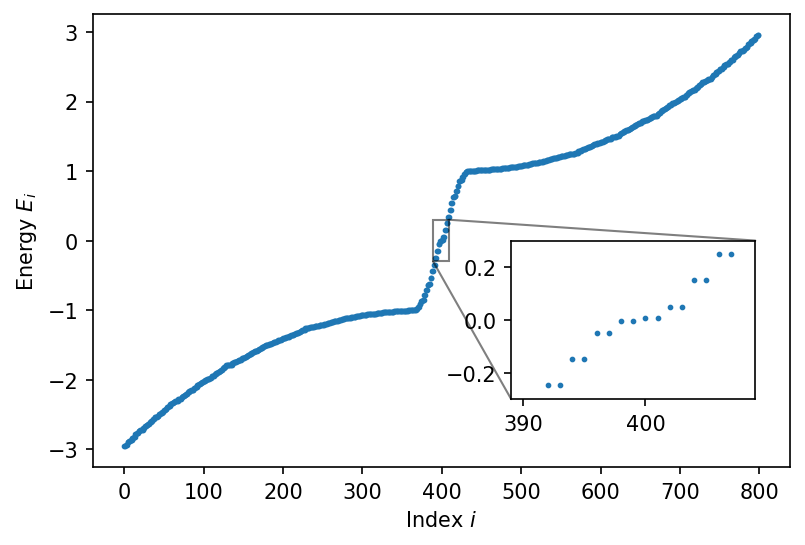

[-0.00550634 -0.00550634  0.00550634  0.00550634]


In [4]:
print("flagged_bonds_triangle = ", flagged_bonds_triangle)

Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())


print("hop_phase_triangle = ", hop_phase_triangle)
print("hop_phase_pentagon = ", hop_phase_pentagon)
for flagged_bond in flagged_bonds_triangle:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_triangle, num_sites
    )

for flagged_bond in flagged_bonds_pentagon:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_pentagon, num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.01
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

# Energy scatter plot with zoom window
fig, ax = plt.subplots()
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_{i}$")
ax.scatter(range(len(energies)), energies, s=3)
axins = ax.inset_axes([0.6, 0.15, 0.35, 0.35])
axins.scatter(range(len(energies)), energies, s=3, zorder=-100)
x1, x2, y1, y2 = gs_idx - 10, gs_idx + 10, -0.3, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.savefig(f"./plots/discl_dipole_spectrum_n_{n}.svg")
plt.show()

print(energies[gs_idx - 1 : gs_idx + 3])

idx = 393 with energy -0.24812998158663546


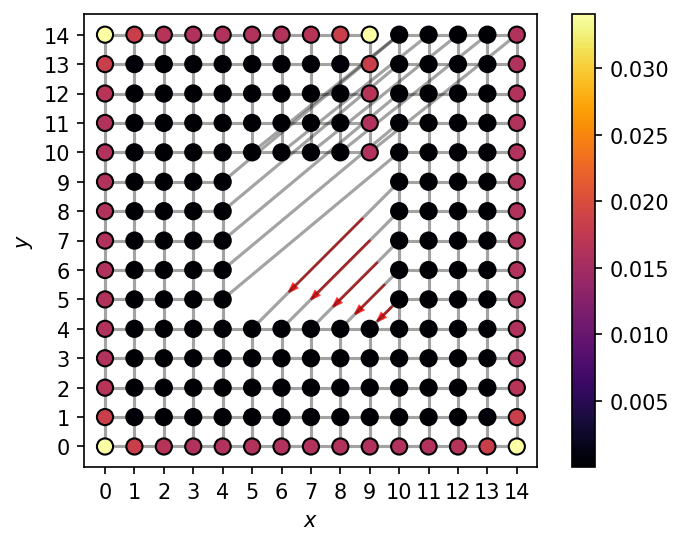

idx = 394 with energy -0.14939383671398476


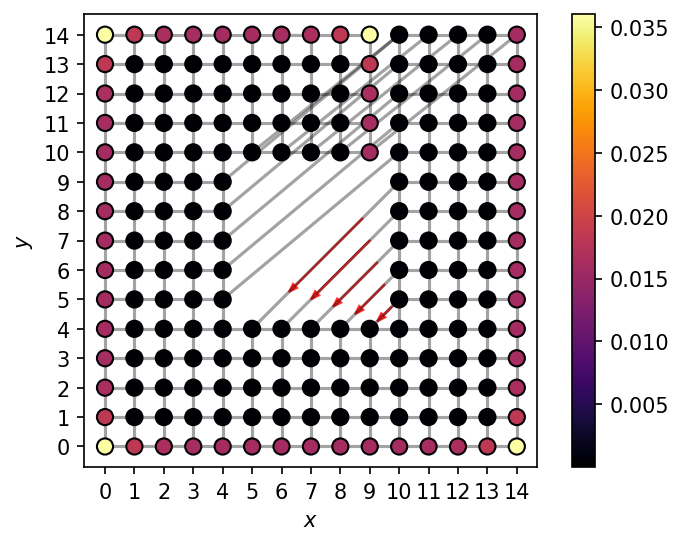

idx = 395 with energy -0.14939383671398454


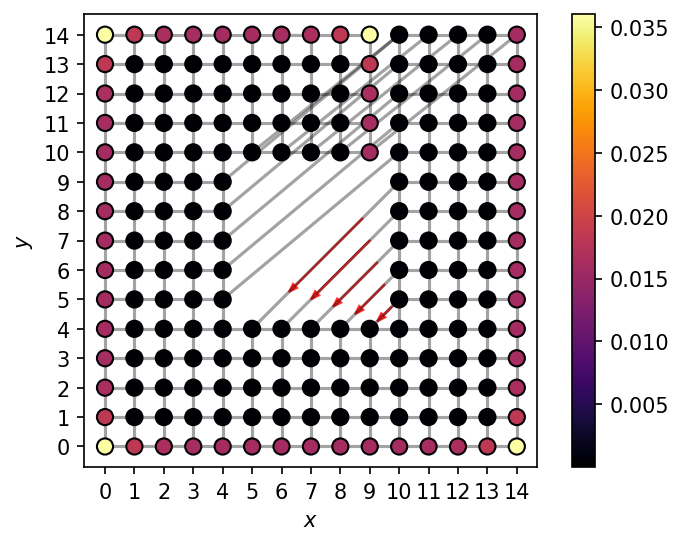

idx = 396 with energy -0.04988369508274537


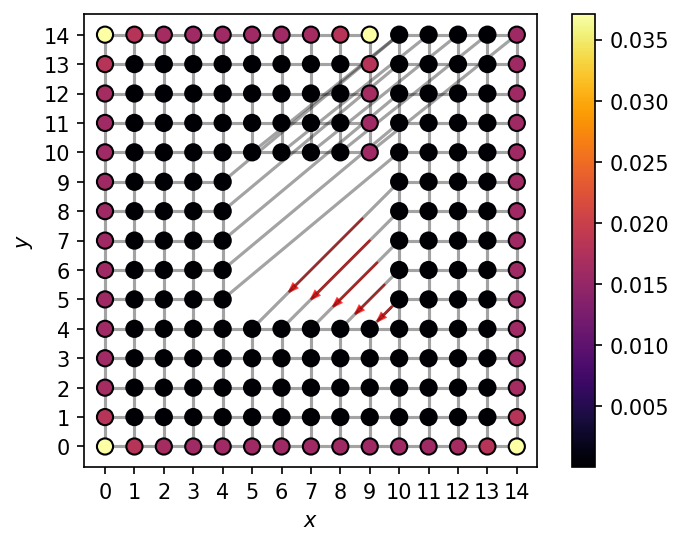

idx = 397 with energy -0.049883695082741625


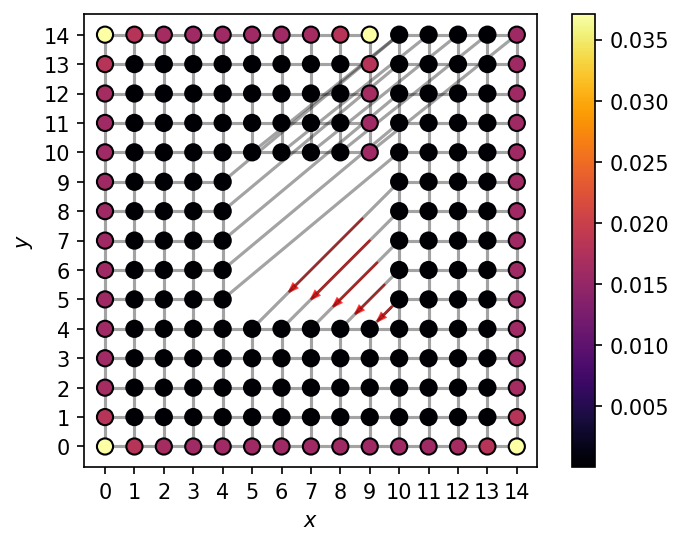

idx = 398 with energy -0.005506339713292526


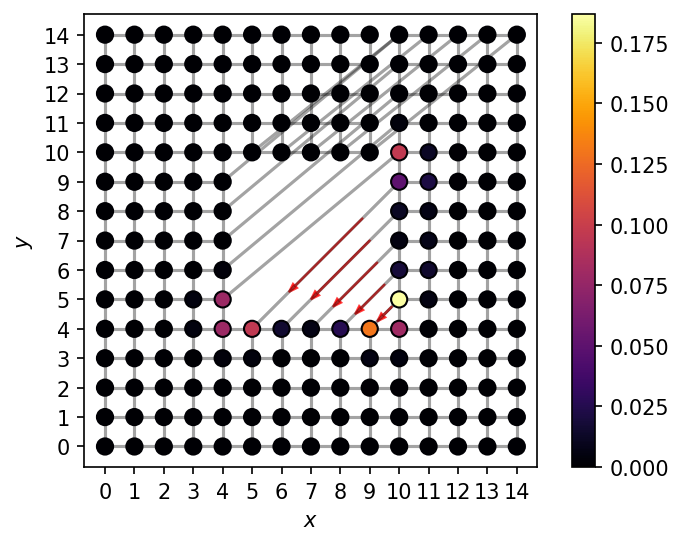

idx = 399 with energy -0.005506339713291737


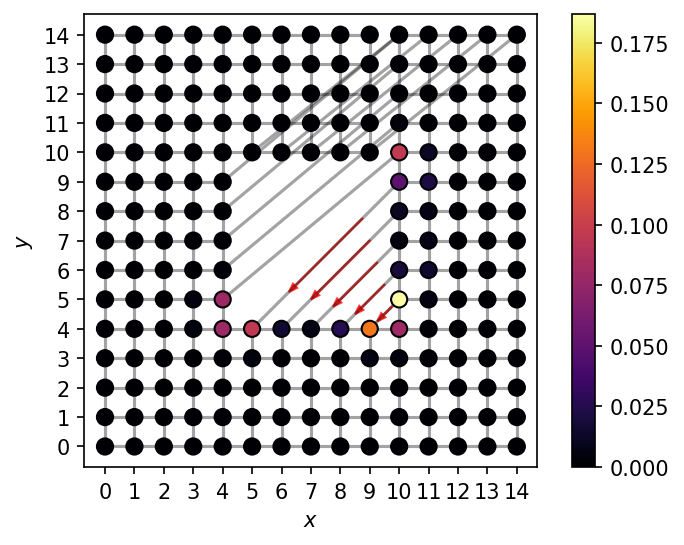

idx = 400 with energy 0.005506339713294275


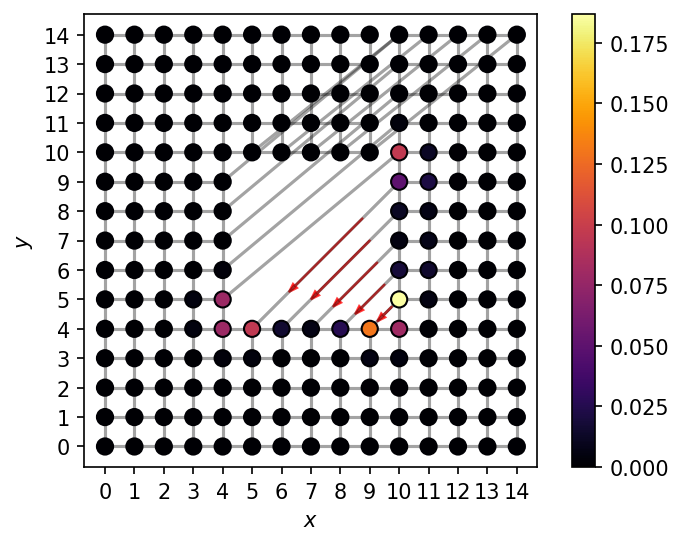

idx = 401 with energy 0.005506339713295116


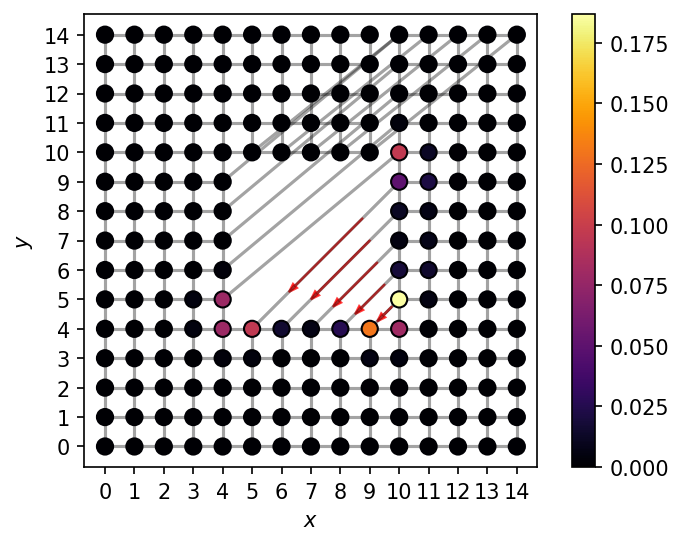

idx = 402 with energy 0.04988369508274138


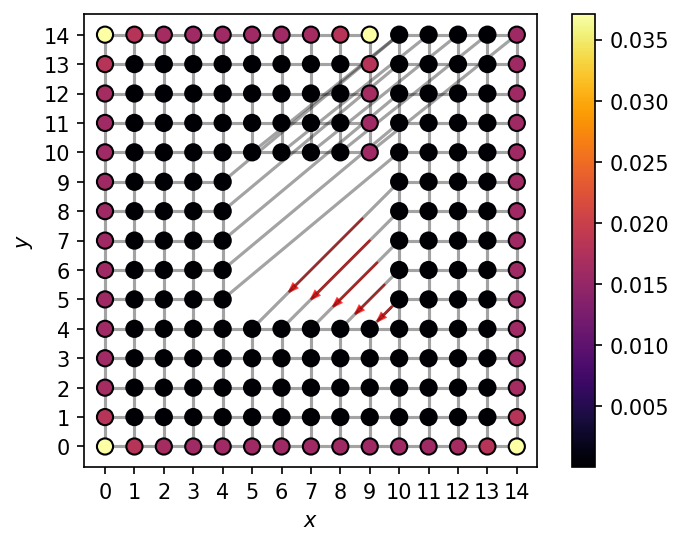

idx = 403 with energy 0.049883695082742034


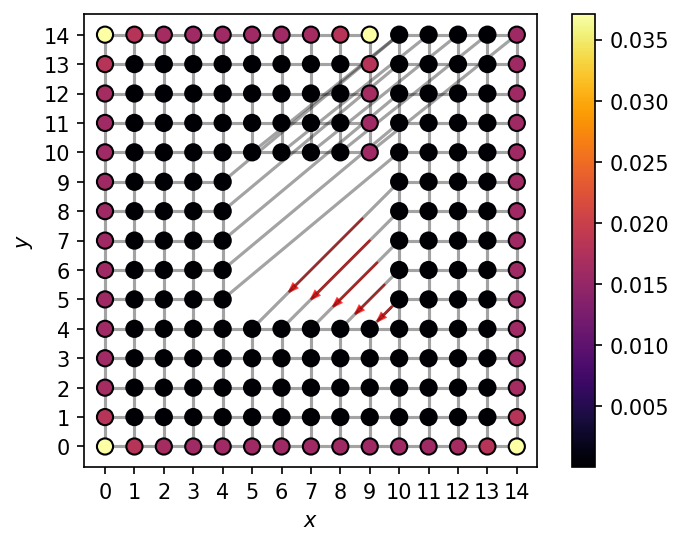

idx = 404 with energy 0.14939383671398535


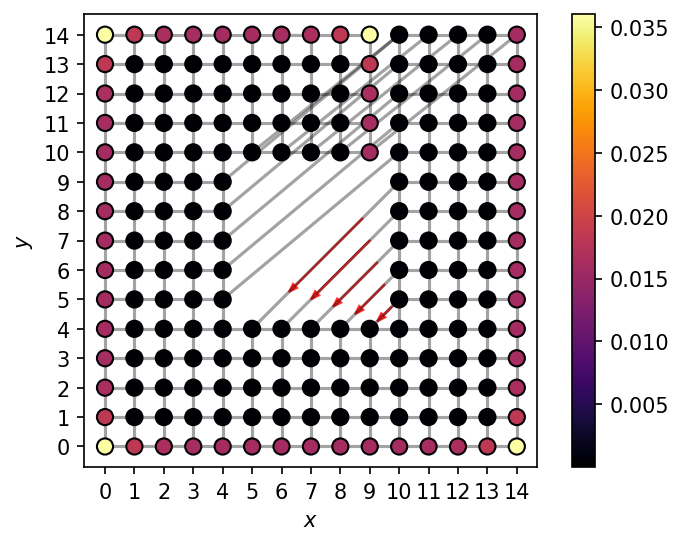

idx = 405 with energy 0.1493938367139861


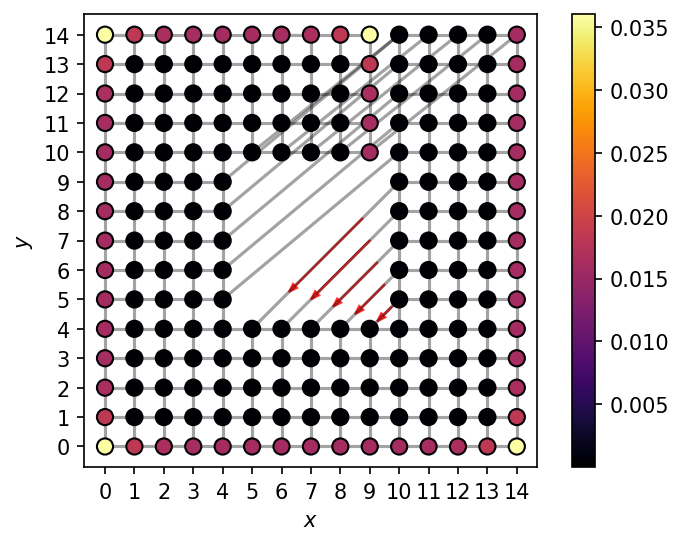

In [5]:
for gs_idx in range(gs_idx - 6, gs_idx + 7):
    print(f"idx = {gs_idx} with energy {energies[gs_idx]}")
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(
        False,
        c=(gs_probabilities),
        flagged_bonds=flagged_bonds_triangle,
        cmap=color_map,
    )
    plt.colorbar(sc)
    plt.savefig(f"./plots/discl_dipole_prob_distr_n_{n}.svg")
    plt.show()

[7.60504555e-06]


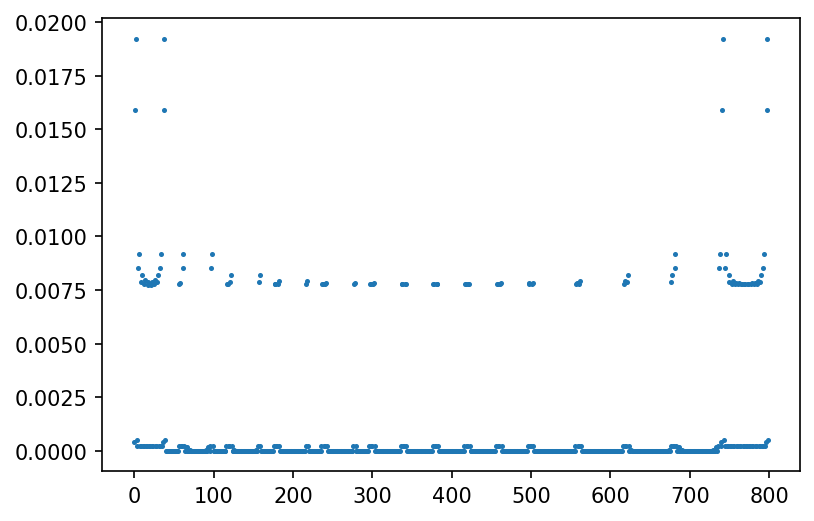

In [6]:
plt.scatter(range(len(gs_probabilities_nambu)), gs_probabilities_nambu, s=2)
print(gs_probabilities[18])